In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
import tsa.dateconverter as converter
import pandas as pd

In [3]:
df= pd.read_csv('/content/AMZN_ts.csv')

In [4]:
# df = pd.DataFrame(df.iloc[::-1])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-01,1563.219971,1585.000000,1552.180054,1582.260010,1582.260010,4572100
1,2018-05-02,1580.979980,1588.500000,1566.359985,1569.680054,1569.680054,4360300
2,2018-05-03,1560.010010,1574.800049,1546.020020,1572.079956,1572.079956,4251900
3,2018-05-04,1562.449951,1584.900024,1562.189941,1580.949951,1580.949951,3443600
4,2018-05-07,1589.339966,1606.949951,1587.829956,1600.140015,1600.140015,3801900
...,...,...,...,...,...,...,...
247,2019-04-25,1917.000000,1922.449951,1900.310059,1902.250000,1902.250000,6099100
248,2019-04-26,1929.000000,1951.000000,1898.000000,1950.630005,1950.630005,8432600
249,2019-04-29,1949.000000,1956.339966,1934.089966,1938.430054,1938.430054,4021300
250,2019-04-30,1930.099976,1935.709961,1906.949951,1926.520020,1926.520020,3506000


In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
from tsa import interpolation

In [10]:
df = interpolation.interpolate_dates(df, 'Date', ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [11]:
df


,Open,High,Low,Close,Adj Close,Volume,Date
0,1563.219971,1585.000000,1552.180054,1582.260010,1582.260010,4.572100e+06,2018-05-01
1,1580.979980,1588.500000,1566.359985,1569.680054,1569.680054,4.360300e+06,2018-05-02
2,1560.010010,1574.800049,1546.020020,1572.079956,1572.079956,4.251900e+06,2018-05-03
3,1562.449951,1584.900024,1562.189941,1580.949951,1580.949951,3.443600e+06,2018-05-04
4,1571.413289,1592.250000,1570.736613,1587.346639,1587.346639,3.563033e+06,2018-05-05
...,...,...,...,...,...,...,...
361,1935.666667,1952.779989,1910.029989,1946.563355,1946.563355,6.962167e+06,2019-04-27
362,1942.333333,1954.559977,1922.059977,1942.496704,1942.496704,5.491733e+06,2019-04-28
363,1949.000000,1956.339966,1934.089966,1938.430054,1938.430054,4.021300e+06,2019-04-29
364,1930.099976,1935.709961,1906.949951,1926.520020,1926.520020,3.506000e+06,2019-04-30


In [12]:
y = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
x = 'Date'

# Testing Properties:

<Axes: >

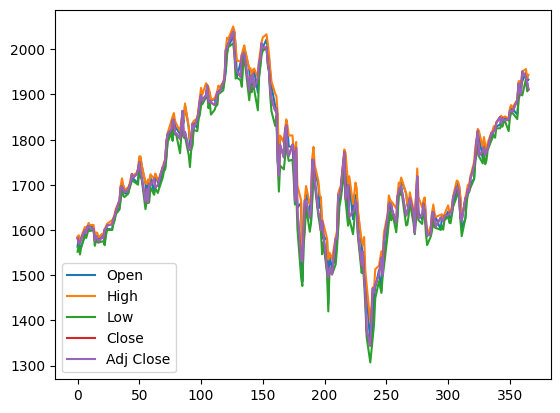

In [13]:
df[y[:-1]].plot()

## Trend

In [14]:
from tsa.properties import Trend

In [15]:
t = Trend(df, y[2], x)

In [16]:
t.detrend()

,Original,Detrend
Date,,
2018-05-01,1552.180054,1552.180054
2018-05-02,1566.359985,1559.366725
2018-05-03,1546.020020,1532.033500
2018-05-04,1562.189941,1541.210162
2018-05-05,1570.736613,1542.763574
...,...,...
2019-04-27,1910.029989,-614.536794
2019-04-28,1922.059977,-609.500065
2019-04-29,1934.089966,-604.463336


In [17]:
t.plot_detrend(remove_time = True)

{'title': 'Original vs Detrend of Low:',
 'data': [1552.180054,
  1566.359985,
  1546.02002,
  1562.189941,
  1570.7366126666668,
  1579.2832843333333,
  1587.829956,
  1582.51001,
  1592.0,
  1603.439941,
  1597.890015,
  1598.6100263333333,
  1599.3300376666666,
  1600.050049,
  1565.219971,
  1576.670044,
  1573.0,
  1572.099976,
  1573.0666506666666,
  1574.0333253333333,
  1575.0,
  1575.25,
  1566.339966,
  1588.380005,
  1600.449951,
  1600.37496925,
  1600.2999875,
  1600.22500575,
  1600.150024,
  1612.930054,
  1621.349976,
  1635.089966,
  1638.5566406666667,
  1642.0233153333334,
  1645.48999,
  1670.060059,
  1686.469971,
  1676.109985,
  1673.01001,
  1675.536662,
  1678.063314,
  1680.589966,
  1691.52002,
  1700.119995,
  1708.869995,
  1708.52002,
  1706.5333663333333,
  1704.5467126666665,
  1702.560059,
  1700.390015,
  1741.359985,
  1717.560059,
  1711.900024,
  1690.0367023333333,
  1668.1733806666666,
  1646.310059,
  1663.339966,
  1660.0,
  1661.170044,
  1694.

## Seasonality

In [18]:
from tsa.properties import Seasonality


In [19]:
s = Seasonality(df, y[1], x)

In [20]:
s.seasonal()

Date
2018-05-01    0.998493
2018-05-02    1.004876
2018-05-03    1.002131
2018-05-04    1.000208
2018-05-05    0.999192
                ...   
2019-04-27    0.999192
2019-04-28    0.998158
2019-04-29    0.996941
2019-04-30    0.998493
2019-05-01    1.004876
Name: seasonal, Length: 366, dtype: float64

## Stationarity


In [21]:
from tsa.properties import Stationarity

In [22]:
s = Stationarity(df, x, y[0])

In [23]:
s.test_stationarity()

1. ADF :  -1.836487123869383
2. P-Value :  0.3625031435259455
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 365
5. Critical Values :
	 1% :  -3.4483935212959844
	 5% :  -2.8694912343676497
	 10% :  -2.571005879151811


As p-value is outside the confidence interval of 95%, series is non-stationary.


In [24]:
s.make_stationary(method = 'log')

p-value:  0.01309621059500321 
As p-value is lesser than 0.05, transformed series is stationary.


12     0.002267
13     0.001205
14     0.001471
15     0.000799
16     0.000484
         ...   
361    0.004133
362    0.003998
363    0.003315
364    0.002690
365    0.002968
Length: 354, dtype: float64

In [25]:
s.get_transform_plot_params()

{'title': 'Transformed series',
 'data': [0.002267024487686342,
  0.0012046345140639403,
  0.0014714336051389054,
  0.0007988537231513604,
  0.0004836544354569483,
  5.025389174129202e-05,
  -0.0003566047036045461,
  -0.0005884546093017917,
  -0.0007849351597073451,
  -0.0009687316964397397,
  -0.00209205615211161,
  -0.0005524909484195817,
  -0.000172933180507151,
  -8.173737910510681e-05,
  0.0007344066122483284,
  0.0012469614138526097,
  0.001055667041840458,
  0.001915530776400054,
  0.0021030608876015933,
  0.0027559467681133043,
  0.0028927746896156847,
  0.0028367592101750105,
  0.004030349721809046,
  0.003820066661761601,
  0.005116734303426185,
  0.004855100593486483,
  0.0040248262056632456,
  0.004061059330711103,
  0.004097302609908482,
  0.003203299883932864,
  0.0035188178848786222,
  0.0032830183450798245,
  0.0036023895809398354,
  0.0034269890641587253,
  0.0031012519783297776,
  0.0017668619106308014,
  8.551344433982422e-05,
  0.0005125803468972734,
  0.00298838572

In [26]:
from tsa.properties import Autocorrelation

In [27]:
a = Autocorrelation()
a.autocorrelation(df[y[4]], differencing = 2, n_lags = 10)

{'title': 'Autocorrelation plot: differencing = 2',
 'acf_line': [1.0,
  -0.5018446484929567,
  -0.028752276319678173,
  0.07906417053089476,
  -0.053401856652945126,
  -0.0019191207161867508,
  -0.026089893047793727,
  0.07016104679128261,
  -0.008915201810669246,
  -0.04200340350172307,
  0.04034880677750253],
 'lower': [-0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606],
 'upper': [0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606],
 'zero': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [28]:
a.durbin_watson_test(df[y[4]], summary = True)

As value of statistic is close to 0, series is positively autocorrelated.


0.03702740744372263

In [29]:
a.estimate_q()

(0, 1)

## Partial Autocorrelation

In [30]:
from tsa.properties import PartialAutocorrelation

In [31]:
p = PartialAutocorrelation()
p.partial_autocorrelation(df[y[3]], differencing = 2, n_lags = 10)

{'title': 'Partial autocorrelation plot: differencing = 2',
 'pacf_line': [1.0,
  -0.5032271406375655,
  -0.37782923561100235,
  -0.20379105956749569,
  -0.1795111842599817,
  -0.16323130246165563,
  -0.20785021994648445,
  -0.10896374645365561,
  -0.04499671837563056,
  -0.06640348564786362,
  -0.030321487252215947],
 'lower': [-0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606,
  -0.10245084120390606],
 'upper': [0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606,
  0.10245084120390606],
 'zero': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [32]:
p.estimate_p()

(0, 1)

## Cross Correlation

In [33]:
from tsa.properties import CrossCorrelation

In [34]:
c = CrossCorrelation(df[y[3]], df[y[2]], df[x])

In [35]:
c.cross_correlation(20, summary = True)

Max positive correlation is 0.9929227437072866 at lag = 0 
Max negative correlation is -0.5556887990616444  at lag = 120


0.6298194774758891

## Granger Causality

In [36]:
from tsa.properties import granger_causality_matrix

In [37]:
granger_causality_matrix(df, y, summary = True)

High "granger causes" Open with p-value of 0.0.

Low "granger causes" Open with p-value of 0.0.

Close "granger causes" Open with p-value of 0.0.

Adj Close "granger causes" Open with p-value of 0.0.

Volume "granger causes" Open with p-value of 0.0087.

Open "granger causes" High with p-value of 0.0001.

Low "granger causes" High with p-value of 0.0.

Close "granger causes" High with p-value of 0.0.

Adj Close "granger causes" High with p-value of 0.0.

Volume "granger causes" High with p-value of 0.0.

Open "granger causes" Low with p-value of 0.0.

Close "granger causes" Low with p-value of 0.0.

Adj Close "granger causes" Low with p-value of 0.0.

Volume "granger causes" Low with p-value of 0.042.

High "granger causes" Close with p-value of 0.0035.

Low "granger causes" Close with p-value of 0.0247.

Volume "granger causes" Close with p-value of 0.0033.

High "granger causes" Adj Close with p-value of 0.0035.

Low "granger causes" Adj Close with p-value of 0.0247.

Volume "granger

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x
Open_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.0087
High_y,0.0001,1.0000,0.0000,0.0000,0.0000,0.0000
Low_y,0.0000,0.0969,1.0000,0.0000,0.0000,0.0420
Close_y,0.1664,0.0035,0.0247,1.0000,1.0000,0.0033
Adj Close_y,0.1664,0.0035,0.0247,1.0000,1.0000,0.0033
Volume_y,0.5983,0.6542,0.4333,0.5997,0.5997,1.0000


## Differencing

In [38]:
from tsa.properties import Differencing

In [39]:
d = Differencing(df, y[3], x)

In [40]:
d.adf_test()

p-value:  0.0 
As p-value is lesser than 0.05, transformed series is stationary.


In [45]:
d.plot_diff(remove_time = True)

{'data': [-12.579956000000038,
  2.399902000000111,
  8.869995000000017,
  6.39668800000004,
  6.396687999999813,
  6.39668800000004,
  -7.75,
  15.609985000000052,
  1.0799560000000383,
  -6.169922000000042,
  -0.45666499999992993,
  -0.4566650000001573,
  -0.45666499999992993,
  -25.42004399999996,
  11.160033999999996,
  -5.5200190000000475,
  -7.3900149999999485,
  3.6966553333334105,
  3.696655333333183,
  3.6966553333334105,
  -4.059936999999991,
  20.45996100000002,
  1.2099610000000212,
  7.080077999999958,
  0.6799927500001104,
  0.679992749999883,
  0.679992749999883,
  0.6799927500001104,
  12.020019999999931,
  4.729980000000069,
  11.920043999999962,
  7.909993666666651,
  7.909993666666651,
  7.909993666666651,
  31.07995600000004,
  -0.5999759999999696,
  -6.4499510000000555,
  -5.31005899999991,
  1.7100016666665852,
  1.7100016666668125,
  1.7100016666665852,
  9.630004999999983,
  6.1099850000000515,
  19.0,
  -7.890014000000065,
  2.6066893333334065,
  2.606689333333

In [42]:
from tsa.visualization import *

In [43]:
stacked_area_plot(df, y[:-1], x, 'Stock Market Data', remove_time = True)

{'title': 'Stock Market Data',
 'names': ['Open', 'High', 'Low', 'Close', 'Adj Close'],
 'vals': [[1563.219971,
   1580.97998,
   1560.01001,
   1562.449951,
   1571.4132893333333,
   1580.3766276666668,
   1589.339966,
   1595.0,
   1600.0,
   1608.47998,
   1610.98999,
   1608.6599933333334,
   1606.3299966666666,
   1604.0,
   1587.800049,
   1577.5,
   1580.560059,
   1581.329956,
   1582.553304,
   1583.776652,
   1585.0,
   1589.890015,
   1571.050049,
   1598.030029,
   1603.0,
   1602.4274902500001,
   1601.8549805,
   1601.28247075,
   1600.709961,
   1618.099976,
   1623.0,
   1637.030029,
   1640.986694,
   1644.943359,
   1648.900024,
   1672.98999,
   1704.51001,
   1698.560059,
   1681.119995,
   1681.25,
   1681.380005,
   1681.51001,
   1693.0,
   1702.810059,
   1713.47998,
   1714.0,
   1711.4200033333334,
   1708.8400066666666,
   1706.26001,
   1709.040039,
   1742.5,
   1760.0,
   1742.619995,
   1729.25,
   1715.880005,
   1702.51001,
   1672.369995,
   1708.10998

In [44]:
stream_graph(df, y[:-1], x, remove_time = True)

{'data': [['2018-05-01', 1563.219971, 'Open'],
  ['2018-05-02', 1580.97998, 'Open'],
  ['2018-05-03', 1560.01001, 'Open'],
  ['2018-05-04', 1562.449951, 'Open'],
  ['2018-05-05', 1571.4132893333333, 'Open'],
  ['2018-05-06', 1580.3766276666668, 'Open'],
  ['2018-05-07', 1589.339966, 'Open'],
  ['2018-05-08', 1595.0, 'Open'],
  ['2018-05-09', 1600.0, 'Open'],
  ['2018-05-10', 1608.47998, 'Open'],
  ['2018-05-11', 1610.98999, 'Open'],
  ['2018-05-12', 1608.6599933333334, 'Open'],
  ['2018-05-13', 1606.3299966666666, 'Open'],
  ['2018-05-14', 1604.0, 'Open'],
  ['2018-05-15', 1587.800049, 'Open'],
  ['2018-05-16', 1577.5, 'Open'],
  ['2018-05-17', 1580.560059, 'Open'],
  ['2018-05-18', 1581.329956, 'Open'],
  ['2018-05-19', 1582.553304, 'Open'],
  ['2018-05-20', 1583.776652, 'Open'],
  ['2018-05-21', 1585.0, 'Open'],
  ['2018-05-22', 1589.890015, 'Open'],
  ['2018-05-23', 1571.050049, 'Open'],
  ['2018-05-24', 1598.030029, 'Open'],
  ['2018-05-25', 1603.0, 'Open'],
  ['2018-05-26', 1602.4